In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)
len(recent_date[0])



('2017-08-23',)


10

In [55]:
month_int = ""
day_int = ""

for index, letter in enumerate(recent_date[0]):
    if index == 5 or index == 6:
        month_int = month_int + letter
        
    if index == 8 or index == 9:
        day_int = day_int + letter
        
print(month_int)
print(day_int)

08
23


KeyError: "None of [Index(['2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23',\n       '2016-08-23', '2016-08-23', '2016-08-24', '2016-08-24', '2016-08-24',\n       ...\n       '2017-08-21', '2017-08-21', '2017-08-21', '2017-08-22', '2017-08-22',\n       '2017-08-22', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23'],\n      dtype='object', name='date', length=2230)] are in the [columns]"

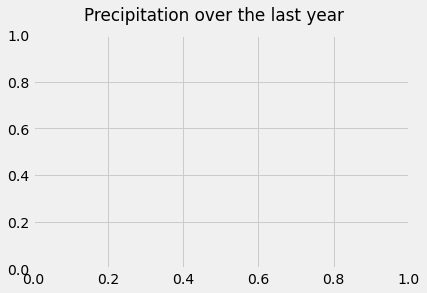

In [92]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_format = dt.date(int(recent_date[0][0:4]), int(month_int), int(day_int))
prev_year_date = date_format - dt.timedelta(366)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]

last_year = session.query(*sel).filter(Measurement.date > prev_year_date).\
order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
year_prcp_df = pd.DataFrame(last_year)
year_prcp_df = year_prcp_df.set_index('date')

# Sort the dataframe by date
year_prcp_df = year_prcp_df.sort_index(ascending=True)


# An emptry string and then a for loop to append only every 7th date (day) to our list.
# This will be used for our tick label.
new_ticks = []
for i, date in enumerate(x_axis):
    if i%7 == 0:
        new_ticks.append(date)
    else:
        new_ticks.append('')
        
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = year_prcp_df.index
y_axis = year_prcp_df["prcp"]

fig, ax = plt.subplots()
fig.suptitle("Precipitation over the last year")
year_prcp_df.plot(kind='scatter', x=x_axis, y=y_axis, ax=ax)

ax.set_xticklabels(new_ticks, rotation=90)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")

plt.tight_layout()
plt.show()


In [89]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [94]:
# Design a query to calculate the total number stations in the dataset
len(session.query(Measurement.station).group_by(Measurement.station).all())

9

In [100]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [102]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

session.query(*sel).filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [104]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, Measurement.tobs]

session.query(*sel).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > prev_year_date).\
order_by(Measurement.date.desc()).all()

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

# Close session

In [ ]:
# Close Session
session.close()